In [6]:
#Programa que implementa computacionalmente a wavelet de Ricker, Ormsby e Butterworth
from scipy import signal
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
def Ricker_Wavelet(Peak_freq, Samples, Dt):
    t = np.arange(Samples)*(Dt/1000)
    t = np.concatenate((np.flipud(-t[1:]), t), axis=0)
    ricker = (1. -2.*(np.pi**2)*(Peak_freq**2)*(t**2))*np.exp(-(np.pi**2)*(Peak_freq**2)*(t**2))
    return t, ricker

def Ormsby_Wavelet(f,Samples, Dt):
    assert len(f) == 4, 'Ormsby wavelet needs 4 frequencies as input'
    f = np.sort(f) #Ormsby wavelet frequencies must be in increasing order
    t = np.arange(Samples)*(Dt/1000)
    t = np.concatenate((np.flipud(-t[1:]), t), axis=0)
    #t = np.linspace(-Duration,Duration,int(Duration/Sampling))
    pif   = np.pi*f
    den1  = pif[3] - pif[2]
    den2  = pif[1] - pif[0]
    term1 = (pif[3]*np.sinc(f[3]*t))**2 - (pif[2]*np.sinc(f[2]*t))**2
    term2 = (pif[1]*np.sinc(f[1]*t))**2 - (pif[0]*np.sinc(f[0]*t))**2

    wav   = term1/den1 - term2/den2;
    wav /= np.amax(wav)
    return t, wav

def Butter_Wavelet(Freq_hi, Freq_low, Samples, Dt):
    t = np.arange(Samples)*(Dt/1000)
    t = np.concatenate((np.flipud(-t[1:]), t), axis=0)
    imp = signal.unit_impulse(t.shape[0], 'mid')
    b, a = signal.butter(4, Freq_hi,fs = 1000*(1/Dt))
    response_zp = signal.filtfilt(b, a, imp)
    low_b, low_a = signal.butter(2,Freq_low,'hp', fs = 1000*(1/Dt))
    butter_wvlt = signal.filtfilt(low_b, low_a, response_zp)
    return t, butter_wvlt
    

In [8]:
lenght = 36
Freq_domin = 10
dt = 4
Time , Ricker_wvlt = Ricker_Wavelet(Freq_domin,lenght,dt)
#Ricker wavelet spectrum
freqs = np.fft.rfftfreq(Time.shape[0], d=dt/1000)
a = np.fft.rfft(Ricker_wvlt)
A = np.abs(a)

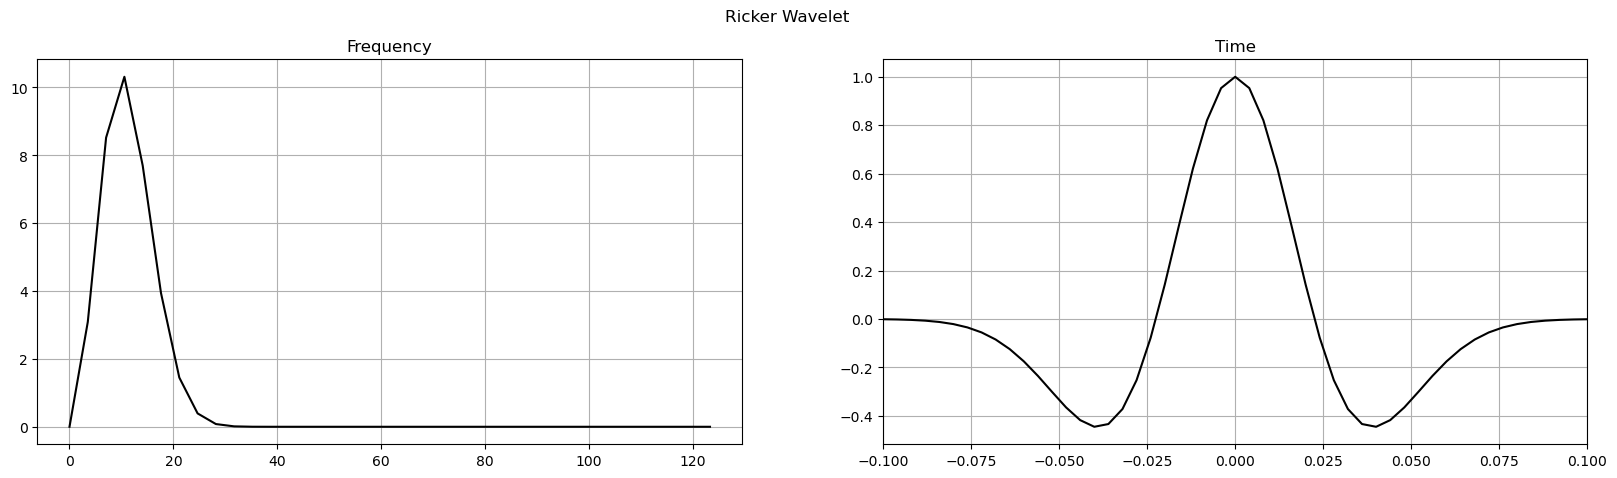

In [9]:
# display wavelet
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Ricker Wavelet')
axs[0].plot(freqs, A, 'k')
axs[0].grid()
axs[0].set_title('Frequency')
axs[1].plot(Time, Ricker_wvlt, 'k')
axs[1].set_xlim(-0.1,0.1)
axs[1].grid()
axs[1].set_title('Time')

plt.show()

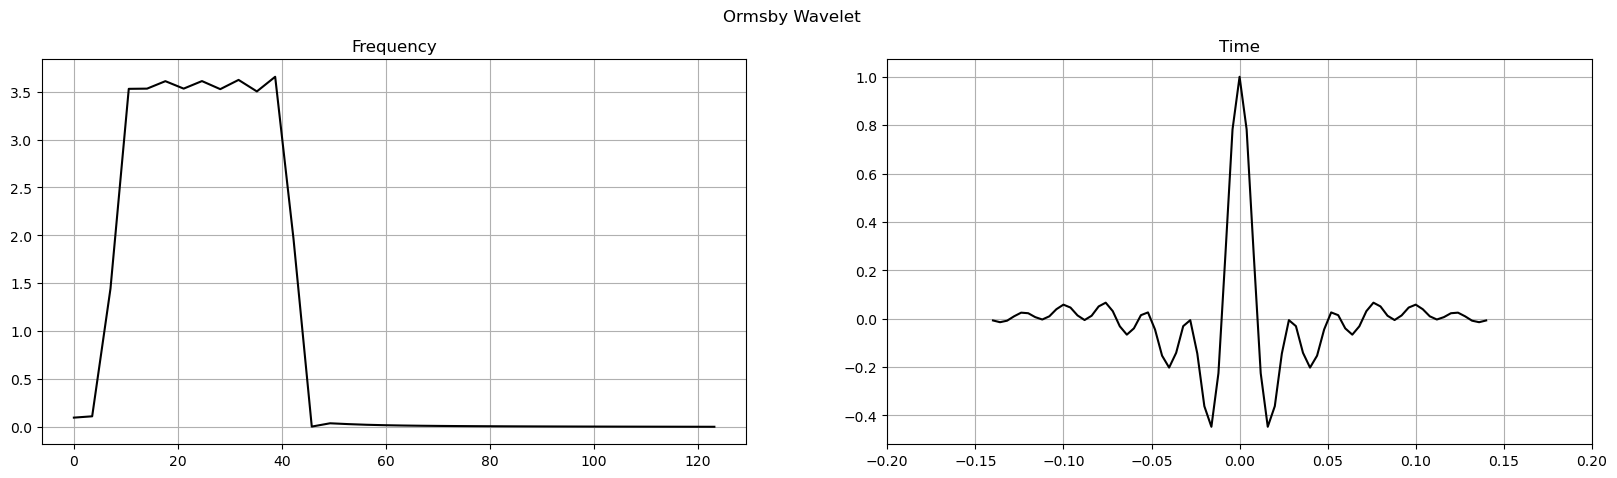

In [10]:
time, orms_wvlt = Ormsby_Wavelet((5,10,40,45),36,4)

orms_fft = abs(np.fft.rfft(orms_wvlt))
freqs = np.fft.rfftfreq(time.shape[0], d=dt/1000)

# display wavelet
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Ormsby Wavelet')
axs[0].plot(freqs, orms_fft, 'k')
axs[0].grid()
axs[0].set_title('Frequency')
axs[1].plot(time, orms_wvlt, 'k')
axs[1].set_xlim(-0.2,0.2)
axs[1].grid()
axs[1].set_title('Time')
plt.show()

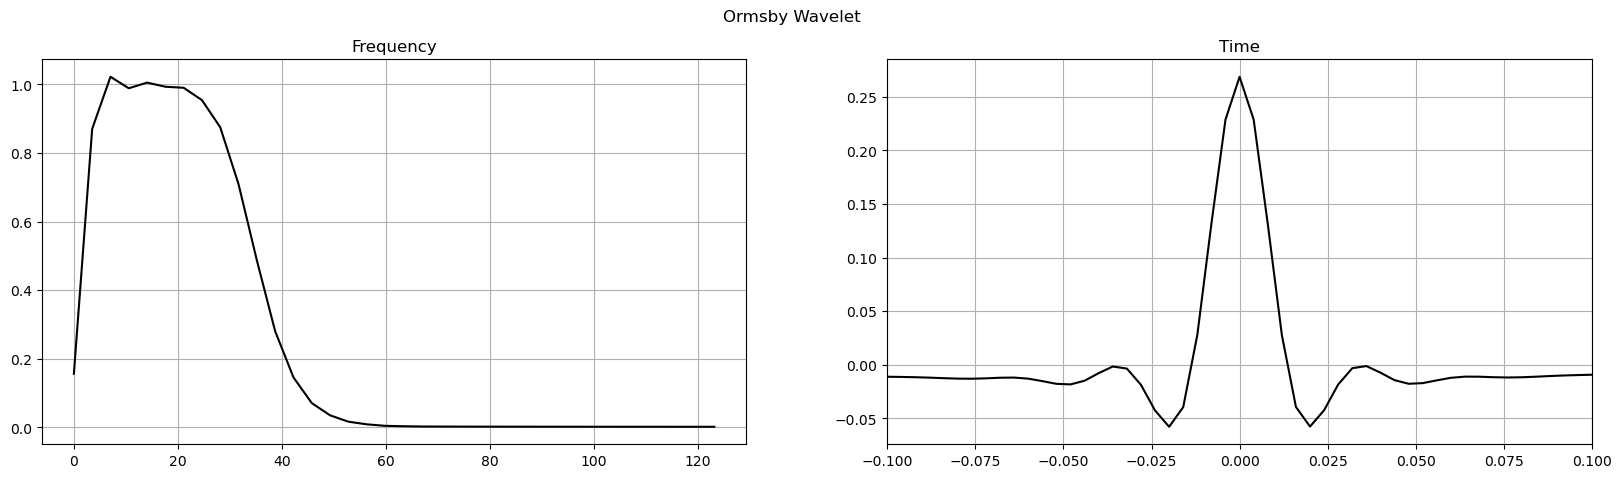

In [11]:
Samples = 36
Dt = 4
t, butter_wvlt = Butter_Wavelet(35, 1.5, Samples, Dt)

butter_fft = abs(np.fft.rfft(butter_wvlt))
freqs = np.fft.rfftfreq(t.shape[0], d=Dt/1000)


# display wavelet
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Ormsby Wavelet')
axs[0].plot(freqs, butter_fft, 'k')
axs[0].grid()
axs[0].set_title('Frequency')
axs[1].plot(t,butter_wvlt, 'k')
axs[1].set_xlim(-0.1,0.1)
axs[1].grid()
axs[1].set_title('Time')
plt.show()


In [12]:
with open('Ormsby_wavelet.txt','w') as wvlt_file:
     for lines in orms_wvlt:
          wvlt_file.write(str(lines))
          wvlt_file.write('\n')

with open('Butterworth_wavelet.txt','w') as wvlt_file:
     for lines in butter_wvlt:
          wvlt_file.write(str(lines))
          wvlt_file.write('\n')

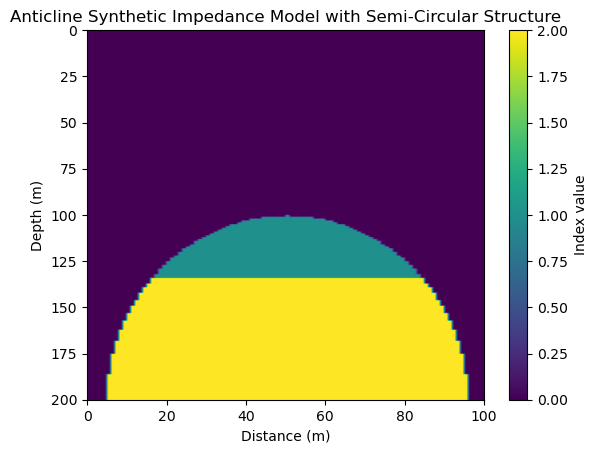

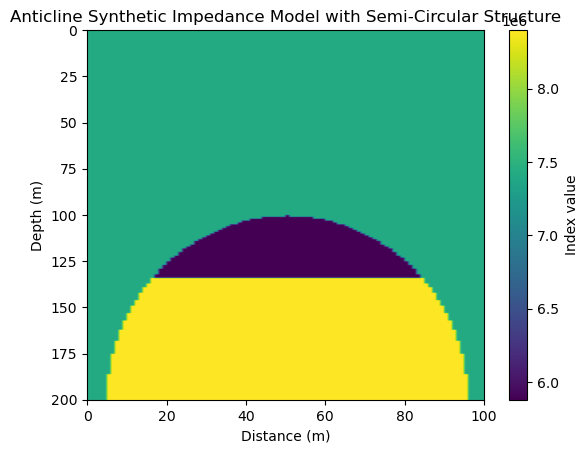

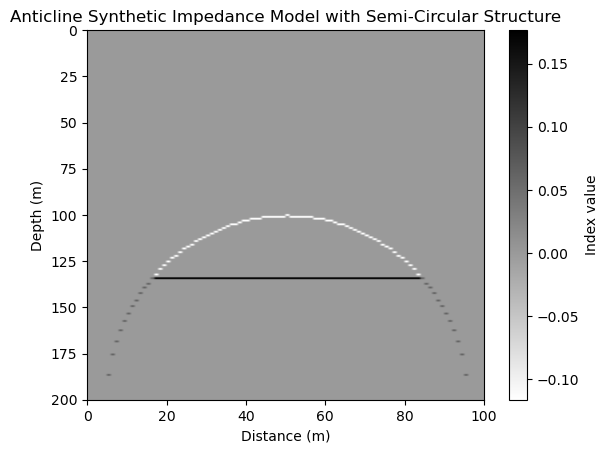

In [13]:
# Define parameters
depth = 200  # Depth of the model in meters
width = 100  # Width of the model in meters
num_layers = 3  # Number of layers
layer_thickness = depth / num_layers  # Thickness of each layer

# Define semi-circle anticline geometry
def semi_circle(x, z):
    center_x = width // 2
    radius = depth // 2 
    return (2.2*(x - center_x)) ** 2 + ((z - depth)) ** 2 <= radius ** 2

# Generate synthetic impedance model
def generate_anticline_model():
    index_model = np.zeros((depth, width),dtype=int)
    for i in range(depth):
        for j in range(width):
            if semi_circle(j, i):
                index_model[i, j] = i//layer_thickness   # Constant impedance for simplicity
    return index_model

# Plot the index model
def plot_idx_model(impedance_model):
    plt.imshow(impedance_model, cmap='viridis', aspect='auto', extent=[0, width, depth, 0])
    plt.colorbar(label='Index value')
    plt.title('Anticline Synthetic Impedance Model with Semi-Circular Structure')
    plt.xlabel('Distance (m)')
    plt.ylabel('Depth (m)')
    plt.show()

# Plot the impedance model
def plot_ip_model(impedance_model):
    plt.imshow(impedance_model, cmap='viridis', aspect='auto', extent=[0, width, depth, 0])
    plt.colorbar(label='Index value')
    plt.title('Anticline Synthetic Impedance Model with Semi-Circular Structure')
    plt.xlabel('Distance (m)')
    plt.ylabel('Depth (m)')
    plt.show()

# Plot the rc model
def plot_rc_model(impedance_model):
    plt.imshow(impedance_model, cmap='gray_r', aspect='auto', extent=[0, width, depth, 0])
    plt.colorbar(label='Index value')
    plt.title('Anticline Synthetic Impedance Model with Semi-Circular Structure')
    plt.xlabel('Distance (m)')
    plt.ylabel('Depth (m)')
    plt.show()

# Generate and plot the impedance model
index_model = generate_anticline_model()
plot_idx_model(index_model)

# Create a arry with the Vp and rho values for impedance calculation
rocks_prop = np.array([[2700, 2750], #First layer: Vp, rho
                      [2400, 2450],  #Second layer: Vp, rho
                      [2800, 3000]]) #Third layer: Vp, rho

#Feed into one list for each layer index; eg:[0,1,2] the Vp and rho values
prop_model = rocks_prop[index_model]

#Make Vp*rho for each layer
ip_model = np.apply_along_axis(np.prod, -1, prop_model)

#Plot the model
plot_ip_model(ip_model)

#Generate reflectivity function from ip_model
rc =  (ip_model[1:,:] - ip_model[:-1,:]) / (ip_model[1:,:] + ip_model[:-1,:])

#Plot rc
plot_rc_model(rc)

#Now it´s ready for creating the synthetic

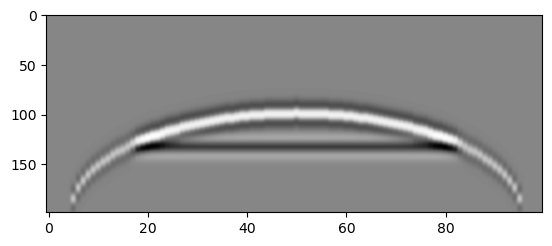

In [56]:
synth = np.apply_along_axis(lambda t: np.convolve(t, Ricker_wvlt, mode='same'),
                            axis=0,
                            arr=rc)

plt.imshow(synth, cmap="Greys", aspect=0.2)
plt.show()

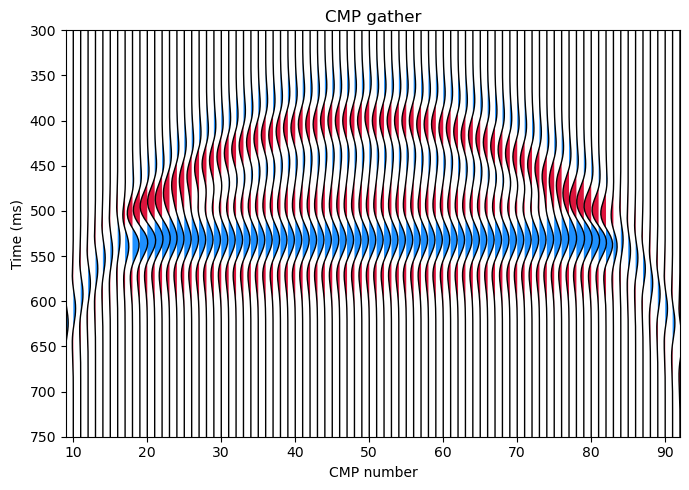

In [15]:
#define the new range of angles
angle = np.arange(0,width,1)

anglegather=[]
for i in range(len(angle)):
    anglegather.append(np.convolve(Ricker_wvlt,rc[:,i],mode='same'))
anglegather=np.asarray(anglegather).T

time2=np.arange(0,(len(ip_model)-1)*dt,dt)

scale_factor=5. #this is scalable according to the plot
anglegatherplt=anglegather*scale_factor #just for the plot
fig=plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
plt.title('CMP gather')
for i in range(len(angle)):
       ax.plot(i+anglegatherplt[:,i],time2,'k',linewidth=1)
       ax.fill_betweenx(time2,anglegatherplt[:,i]+i,i,interpolate=True,
                        where=anglegatherplt[:,i]+i>i,facecolor='dodgerblue')
       ax.fill_betweenx(time2,anglegatherplt[:,i]+i,i,interpolate=True,
                        where=anglegatherplt[:,i]+i<i,facecolor='crimson')
ax.invert_yaxis()
ax.set_xlabel('CMP number')
ax.set_ylabel('Time (ms)')
ax.set_xlim(9,92)
ax.set_ylim(750,300)
plt.tight_layout()

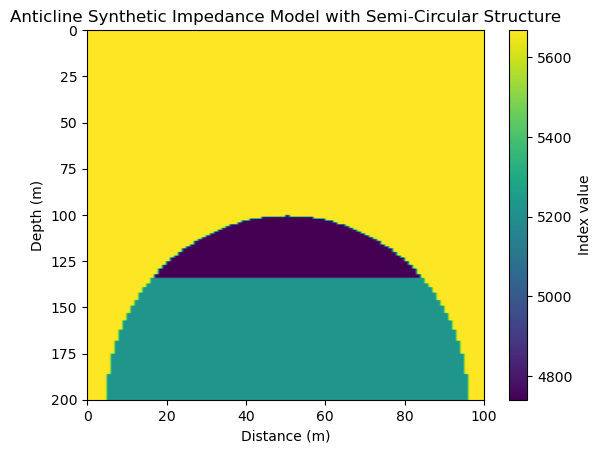

In [68]:
Vpm = np.array([2600,2581.16,2290,2487.07])
Vsm = np.array([1034.62,1004.21,1040.62,1090.66])
Rhom = np.array([2.18,2.12,2.07,2.1])
Ipm = np.array([5800,5473.95,4731.33,5231.72])

# Create a array with the Vp and rho values for impedance calculation
rocks_prop = np.array([[Vpm[0], Rhom[0]], #First layer: Vp, rho
                      [Vpm[2], Rhom[2]],  #Second layer: Vp, rho
                      [Vpm[3], Rhom[3]]]) #Third layer: Vp, rho

#Feed into one list for each layer index; eg:[0,1,2] the Vp and rho values
prop_model = rocks_prop[index_model]

#Make Vp*rho for each layer
ip_model = np.apply_along_axis(np.prod, -1, prop_model)

#Plot the model
plot_ip_model(ip_model)

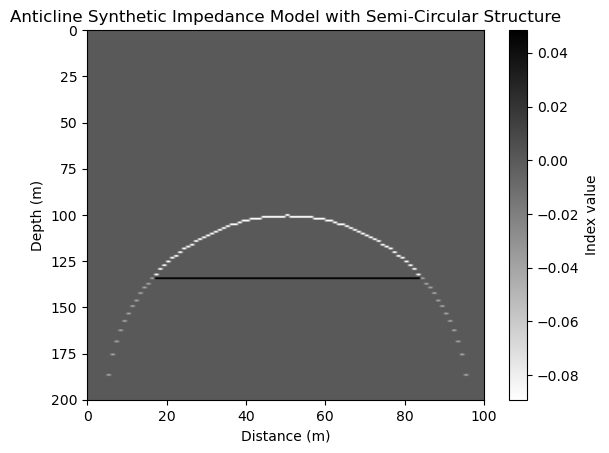

In [69]:
#Generate reflectivity function from ip_model
rc =  (ip_model[1:,:] - ip_model[:-1,:]) / (ip_model[1:,:] + ip_model[:-1,:])

#Plot rc
plot_rc_model(rc)

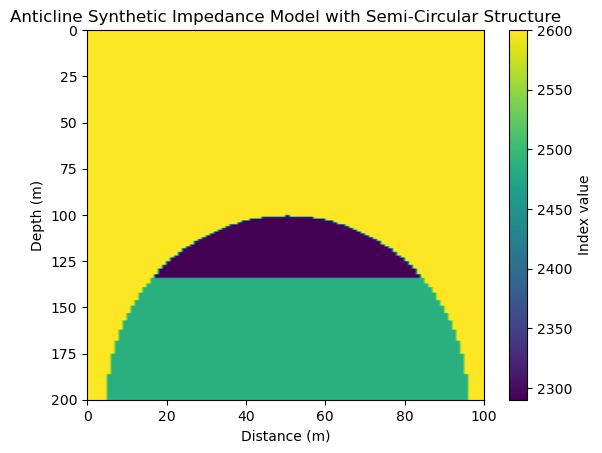

In [70]:
#Plot the model
plot_ip_model(prop_model[:,:,0])

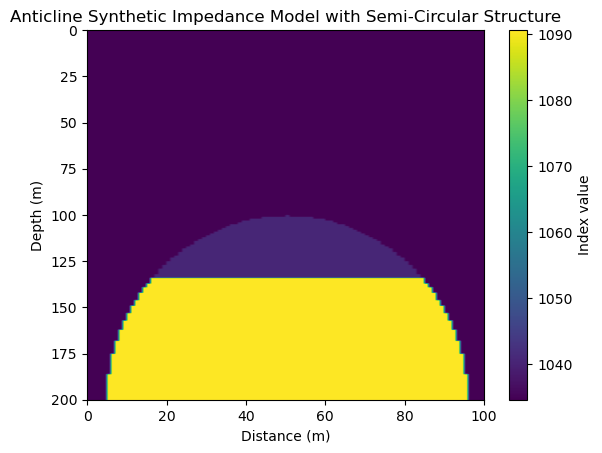

In [97]:
# Create a array with the Vp and rho values for impedance calculation
rocks_prop = np.array([[Vpm[0], Rhom[0],Vsm[0]], #First layer: Vp, rho
                      [Vpm[2], Rhom[2], Vsm[2]],  #Second layer: Vp, rho
                      [Vpm[3], Rhom[3], Vsm[3]]]) #Third layer: Vp, rho

#Feed into one list for each layer index; eg:[0,1,2] the Vp and rho values
prop_model = rocks_prop[index_model]

#Plot the model
plot_ip_model(prop_model[:,:,2])

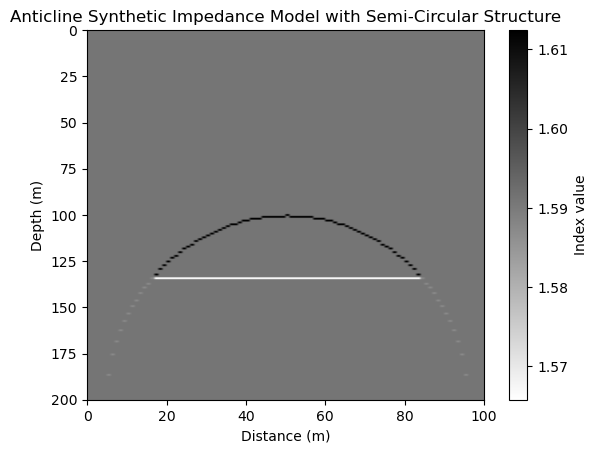

In [130]:
vel = (prop_model[:,:,0])
rho = (prop_model[:,:,1])
vels = (prop_model[:,:,2])

R = (vel[1:,:]*rho[1:,:] - vel[:-1,:]*rho[:-1,:])/ (vel[1:,:]*rho[1:,:] + vel[:-1,:]*rho[:-1,:])
poisson1 = (vel[:-1,:]**2 - 2*(vel[:-1,:]**2)) / (2*(vel[:-1,:]**2 - vels[:-1,:]**2))
poisson2 = (vel[1:,:]**2 - 2*(vels[1:,:]**2)) / (2*(vel[1:,:]**2 - vels[1:,:]**2))
dpoisson = poisson2-poisson1
G = 2.25 * (dpoisson-R)
chi_OWC = 45
Refl_OWC = R*np.cos(np.deg2rad(chi_OWC))+G*np.sin(np.deg2rad(chi_OWC))

plot_rc_model(Refl_OWC)

In [131]:
len(Refl_OWC[0,:])

100

(0.0, 100.0)

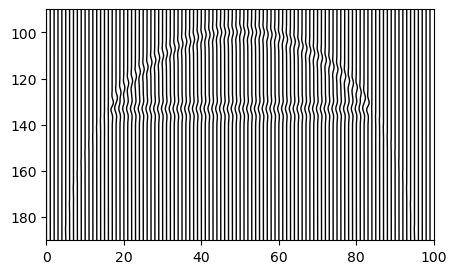

In [132]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
points = 49
a = 2.0
wav = signal.ricker(points, a)
#plt.plot(wav)

t3 = range(0,199)

seismic = np.empty_like(rc)

seismic = np.empty_like(rc)
for nt in range(0, len(Refl_OWC[0,:])):
    traco = np.convolve(Refl_OWC[:, nt], wav, mode='same')
    seismic[:, nt] = traco


fig, ax = plt.subplots(figsize=(5, 3))

scaling = 20
for nt in range(0, len(seismic[0,:])):
    ax.plot(nt + seismic[:, nt]*scaling, t3, color='k', lw=1)

ax.set_ylim(190, 90)
ax.set_xlim(0, 100)

In [133]:
def AVO_Wiggles(wav, rc, nt, dt, model, scl_factor):
    #define the new range of angles
    angle = np.arange(0,nt,1)

    anglegather=[]
    for i in range(len(angle)):
        anglegather.append(np.convolve(wav,rc[:,i],mode='same'))
    anglegather=np.asarray(anglegather).T

    time2=np.arange(0,(len(model)-1)*dt,dt)

    anglegatherplt=anglegather*scl_factor #just for the plot
    fig=plt.figure(figsize=(7,5))
    ax = plt.subplot(1,1,1)
    plt.title('CMP gather')
    for i in range(len(angle)):
        ax.plot(i+anglegatherplt[:,i],time2,'k',linewidth=1)
        ax.fill_betweenx(time2,anglegatherplt[:,i]+i,i,interpolate=True,
                            where=anglegatherplt[:,i]+i>i,facecolor='dodgerblue')
        ax.fill_betweenx(time2,anglegatherplt[:,i]+i,i,interpolate=True,
                            where=anglegatherplt[:,i]+i<i,facecolor='crimson')
    ax.invert_yaxis()
    ax.set_xlabel('CMP number')
    ax.set_ylabel('Time (ms)')
    ax.set_xlim(9,92)
    ax.set_ylim(650,300)
    plt.tight_layout()

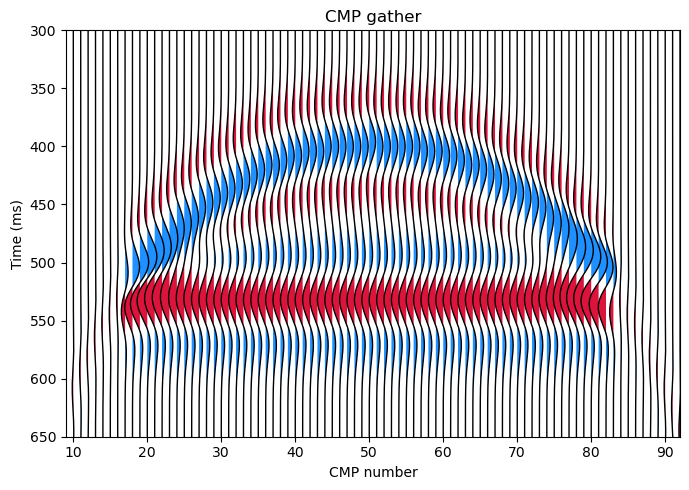

In [137]:
AVO_Wiggles(Ricker_wvlt, Refl_OWC, width, 4, ip_model, 40.)